In [26]:
import numpy as np
import pandas as pd
import bs4
from bs4 import BeautifulSoup
import requests 
import datetime
import re
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
sym = "AAPL"
df_close = pd.DataFrame()

df_temp = pd.read_json('https://cloud.iexapis.com/stable/stock/'+sym+'/chart/1y?token='+token+'')

In [3]:
df_temp.head(4)

,change,changeOverTime,changePercent,close,date,high,label,low,open,uClose,uHigh,uLow,uOpen,uVolume,volume
0,0.00,0.000000,0.0000,186.50,2018-06-20,187.20,"Jun 20, 18",185.73,186.35,186.50,187.20,185.73,186.35,20628701,20628701
1,-1.04,-0.005576,-0.5576,185.46,2018-06-21,188.35,"Jun 21, 18",184.94,187.25,185.46,188.35,184.94,187.25,25711898,25711898
2,-0.54,-0.008472,-0.2912,184.92,2018-06-22,186.15,"Jun 22, 18",184.70,186.12,184.92,186.15,184.70,186.12,27200447,27200447
3,-2.75,-0.023217,-1.4871,182.17,2018-06-25,184.92,"Jun 25, 18",180.73,183.40,182.17,184.92,180.73,183.40,31663096,31663096


In [5]:
url=[None] * 7
soupArr=[None] * 7
articles=[]
AAPLtimes=[]
dates=[]
links=[]
#Figure out how many times apple is mentioned on each page
for i in range(0,6):
    url[i]=requests.get('https://www.nasdaq.com/topic/technology?page=' + str(i+1))
    soupArr[i]=BeautifulSoup(url[i].text,'html.parser')
    articles.append(soupArr[i].find_all("section", attrs={"class": "article-category-section"}))
    for idx,j in enumerate(articles[i]):
        if len(j.find_all("a", attrs={"href": "https://www.nasdaq.com/symbol/aapl"}))>0:
            dates.append(j.find_all('span',attrs={"id":"two_column_main_content_rptArticles_lbArticleInfo_"+str(idx)}))
            inter0=j.find_all("b")
            links.append(inter0)
#                 for idx3,o in enumerate(inter0):
#                     intermediate=inter0.find_all("b")
#                     links.append(o.find_all("a"))
                        

In [6]:
strlinks=[]
for idx,k in enumerate(links):
    for j in k:
        strlinks.append(j)

In [7]:
reallinks=[]
for idx,i in enumerate(strlinks):
    reallinks.append(strlinks[idx].find_all("a")[0].get('href'))

In [8]:
realdates=[]
for idx,i in enumerate(dates):
        realdates.append(dates[idx][0].text.split(",")[0])
uniquedates=np.unique(realdates,return_counts=True)
print(realdates)

['6/20/2019', '6/20/2019', '6/20/2019', '6/19/2019', '6/18/2019', '6/18/2019', '6/17/2019', '6/14/2019', '6/14/2019', '6/13/2019', '6/13/2019', '6/12/2019', '6/12/2019', '6/11/2019', '6/11/2019', '6/11/2019', '6/10/2019']


In [10]:
datesandtimes=[]
for idx, i in enumerate(uniquedates[0]):
    datesandtimes.append(datetime.datetime.strptime(i,"%m/%d/%Y"))

In [11]:
timedeltas=[]
for idx,i in enumerate(datesandtimes):
    tds=datesandtimes[idx]-datetime.datetime.today()
    timedeltas.append(tds.days+1)

In [13]:
# for idx,k in enumerate(articles):
#     for idx2,m in enumerate(articles[idx]):
#         intermediate=m.find_all("b")
#         print(intermediate)
#         for idx3,o in enumerate(intermediate):
#             links.append(o.find_all("a"))

In [15]:
bsoupstuff=[]
for idx,i in enumerate(reallinks):
    soupy=BeautifulSoup(requests.get(i).text,'html.parser')
    # use articlebody
#     bsoupstuff.append(soupy.find_all('div',attrs={"id":"articleText"}))
    bsoupstuff.append(soupy.find_all('div',attrs={"id":"articlebody"}))
#     if idx==2:
#         print(soupy.prettify())

In [16]:
goodwords=['growth','AAPL',"Apple","boom","high"]
contain=[]
for idx,i in enumerate(bsoupstuff):
    inter=[]
    for idx2,j in enumerate(i):
        for k in goodwords:
            inter.append(j.text.count(k))
            
    contain.append(inter)
    

In [25]:
df_temp.tail(len (contain))

,change,changeOverTime,changePercent,close,date,high,label,low,open,uClose,uHigh,uLow,uOpen,uVolume,volume
234,-0.74,-0.044343,-0.4135,178.23,2019-05-28,180.59,"May 28, 19",177.91,178.92,178.23,180.59,177.91,178.92,27948160,27948160
235,-0.85,-0.048901,-0.4769,177.38,2019-05-29,179.35,"May 29, 19",176.00,176.42,177.38,179.35,176.00,176.42,28481165,28481165
236,0.92,-0.043968,0.5187,178.30,2019-05-30,179.23,"May 30, 19",176.67,177.95,178.30,179.23,176.67,177.95,21218412,21218412
237,-3.23,-0.061287,-1.8116,175.07,2019-05-31,177.99,"May 31, 19",174.99,176.23,175.07,177.99,174.99,176.23,27043584,27043584
238,-1.77,-0.070777,-1.0110,173.30,2019-06-03,177.92,"Jun 3, 19",170.27,175.60,173.30,177.92,170.27,175.60,40396069,40396069
239,6.34,-0.036783,3.6584,179.64,2019-06-04,179.83,"Jun 4, 19",174.52,175.44,179.64,179.83,174.52,175.44,30967961,30967961
240,2.90,-0.021233,1.6143,182.54,2019-06-05,184.99,"Jun 5, 19",181.14,184.28,182.54,184.99,181.14,184.28,29773427,29773427
241,2.68,-0.006863,1.4682,185.22,2019-06-06,185.47,"Jun 6, 19",182.14,183.08,185.22,185.47,182.14,183.08,22526311,22526311
242,4.93,0.019571,2.6617,190.15,2019-06-07,191.92,"Jun 7, 19",185.77,186.51,190.15,191.92,185.77,186.51,30684393,30684393
243,2.43,0.032601,1.2779,192.58,2019-06-10,195.37,"Jun 10, 19",191.62,191.81,192.58,195.37,191.62,191.81,26220851,26220851


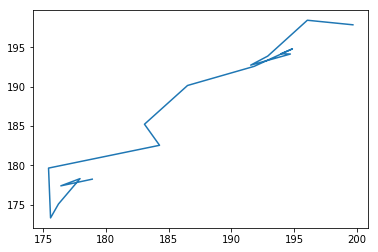

In [27]:
plt.plot(df_temp.tail(17)['open'],df_temp.tail(17)['close'])